# Heart Disease UCI Classification

### Dataset Source:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Dataset Description:
- This Dataset contains 76 attributes, but all published experiments refer to using a subset of 14 of them.
- In particular, the Cleveland Dataset is the only one that has been used by ML researchers to  this date.
- The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

### Dataset Columns:
**age**: The person’s age in years

**sex**: The person’s sex (1 = male, 0 = female)

**cp**: chest pain type
- Value 0: asymptomatic
- Value 1: atypical angina
- Value 2: non-anginal pain
- Value 3: typical angina

**trestbps**: The person’s resting blood pressure (mm Hg on admission to the hospital)

**chol**: The person’s cholesterol measurement in mg/dl

**fbs**: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

**restecg**: resting electrocardiographic results
- Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- Value 1: normal
- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**thalach**: The person’s maximum heart rate achieved

**exang**: Exercise induced angina (1 = yes; 0 = no)

**oldpeak**: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**slope**: the slope of the peak exercise ST segment
- Value 0: downsloping
- Value 1: flat
- Value 2: upsloping

**ca**: The number of major vessels (0–3)

**thal**: A blood disorder called thalassemia
- Value 0: NULL (dropped from the dataset previously
- Value 1: fixed defect (no blood flow in some part of the heart)
- Value 2: normal blood flow
- Value 3: reversible defect (a blood flow is observed but it is not normal)

**target**:
Heart Disease (1 = no, 0 = yes)

# Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Accuracy Calculation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split, StratifiedKFold

# 1. Data Pre-Processing

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
num_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

merge = pd.DataFrame()

for i in num_list:
  merge[i] = df[i].describe()

merge

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### No Null Values
- This dataset has 0 null values.

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Skew Checking

Most features of the dataset are normally distributed, considering the value of the skew that less than one. Several features that noticeably skewed are:


1.   **chol** (Right Skewed)
2.   **fbs** (Right Skewed)
3.   **oldpeak** (Right Skewed)
4.   **ca** (Right Skewed)



In [11]:
print("Skew Value of the Features")
for i in df.columns:
  print(i, " = ", df[i].skew())

Skew Value of the Features
age  =  -0.2024633654856539
sex  =  -0.791335191480832
cp  =  0.48473236883889675
trestbps  =  0.7137684379181465
chol  =  1.1434008206693387
fbs  =  1.986651930914452
restecg  =  0.16252224492761935
thalach  =  -0.5374096526832253
exang  =  0.7425315444212832
oldpeak  =  1.269719930601997
slope  =  -0.5083156098165442
ca  =  1.3104221354767875
thal  =  -0.47672219490975737
target  =  -0.17982105403495655


# 2. Exploratory Data Analysis (EDA)
### Univariate Analysis - Histogram
- Histogram is used for all features, because all features have been encoded into numeric values in the dataset.

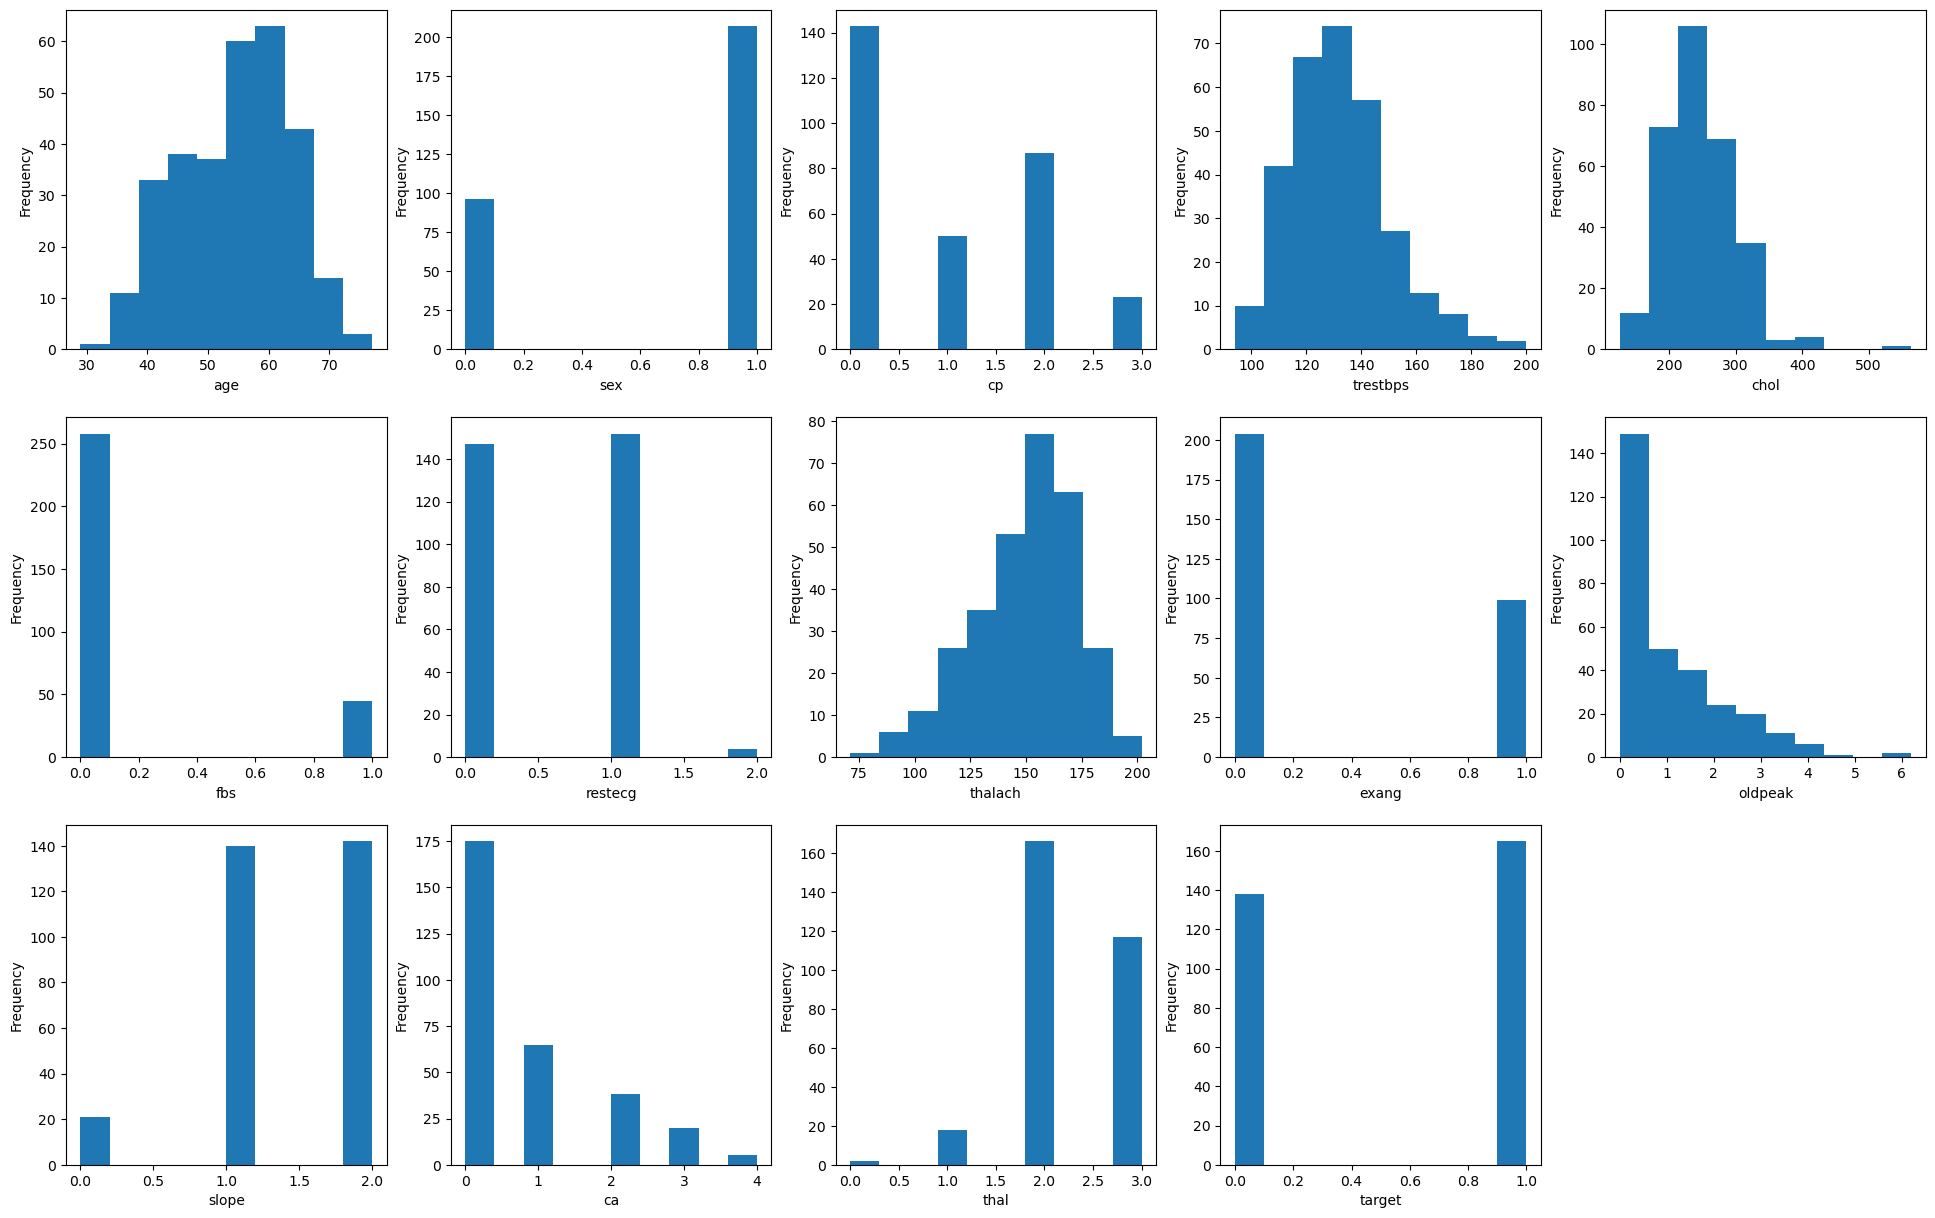

In [12]:
fig = plt.figure(figsize=(24, 15))
i = 0
for column in df:
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(column)
    df[column].plot(kind = 'hist')
    i = i + 1

### Categorical Features vs. Target - Grouped Bar Chart
- To show how the categorical value weigh in determining the target value, grouped bar chart is a straightforward representation.

- For example, sex = 1 and sex = 0 have distinctly distribution of target value, which indicates it is likely to contribute more to the prediction of the target.
- Contrarily, if the target distribution is the same regardless of the categorical features, then it is very likely they are not correlated.

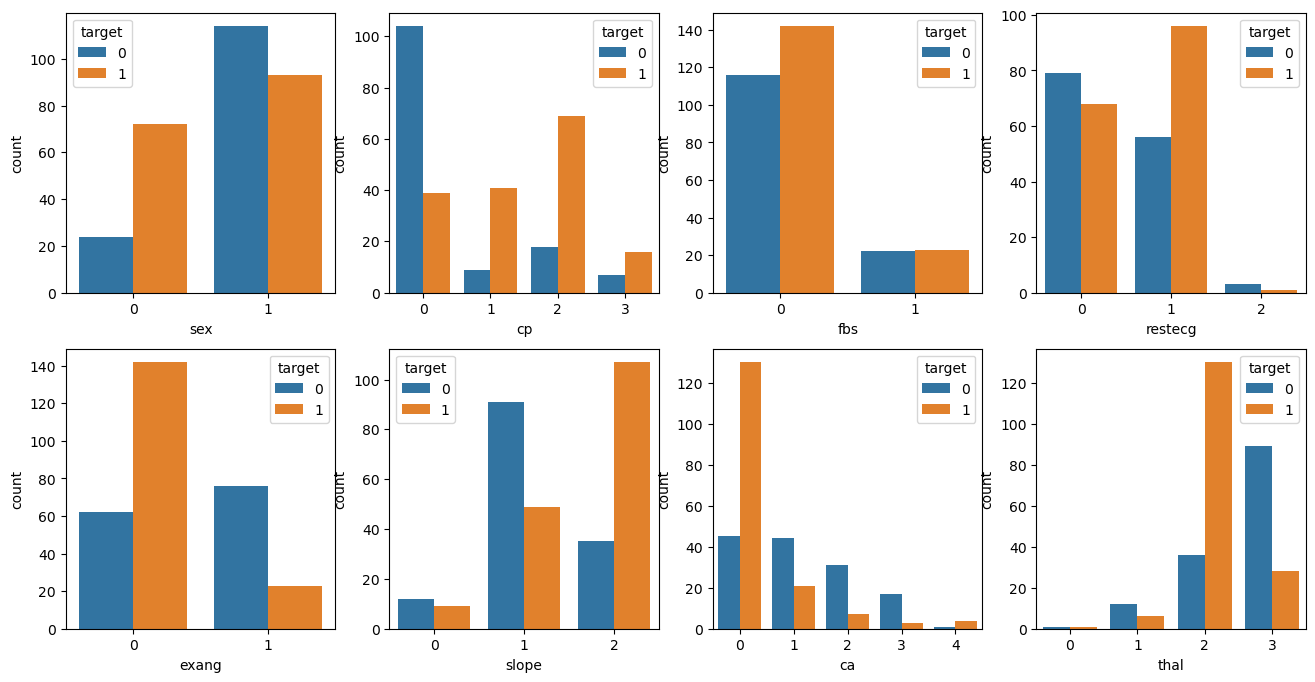

In [13]:
cat_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2, 4, i + 1)
    chart = sns.countplot(data = df, x = column, hue = 'target')

### Numerical Features vs. Target - Box Plot
- Box plot shows how the values of numerical features varies across target groups.

- For example, we can tell that “oldpeak” have distinct difference when target is 0 vs. target is 1, suggesting that it is an important predictor.
- However, ‘trestbps’ and ‘chol’ appear to be less outstanding, as the box plot distribution is similar between target groups.

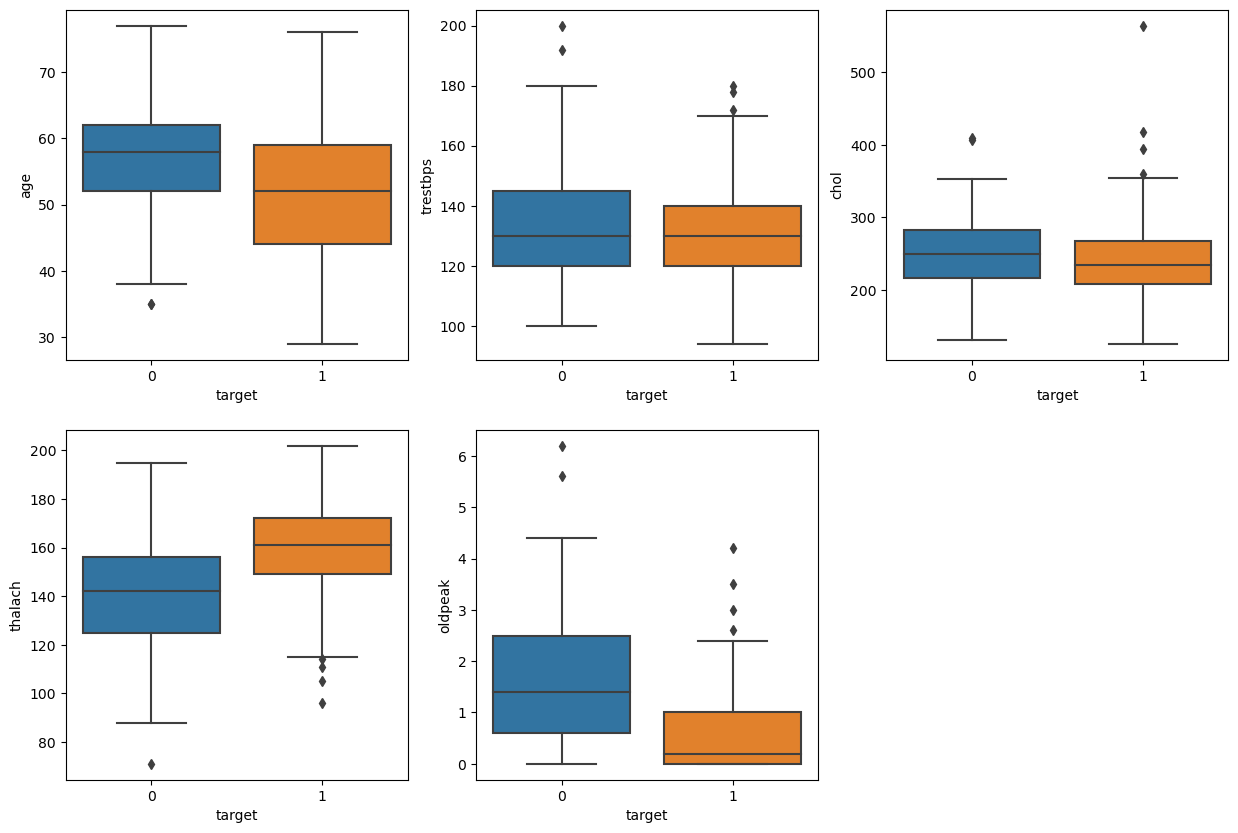

In [14]:
num_list = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
fig = plt.figure(figsize = (15,10))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2, 3, i + 1)
    sns.boxplot(x = 'target', y = column, data = df)

# 3. Feature Engineering

### Univariate Selection

In [ ]:
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

### Feature Importance
- Feature Importance can help us gain the significance of each feature of the dataset by using the Model Characteristics property,

- Feature value gives us a score for every function of the results, the higher the score the more significant or appropriate the performance variable is,

- Feature importance is the built-in class that comes with CatBoost Classifiers, we will use the CatBoost Classifier to determine which feature has best performance

In [15]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class feature_importances of tree based classifiers

#Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

GaussianNB(var_smoothing=1e-10)

### Correlation Matrix
- Correlation Matrix indicates how the features are related to each other or to the target variable,

- The correlation may be positive which increase in one value of the feature increases the value of the target variable or negative where it increase in one value of the feature decreases the value of the target variable,

- Heatmap makes it easy to classify the features who are the most relevant to the target variable.

age 41
sex 2
cp 4
trestbps 49
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 5
thal 4
target 2


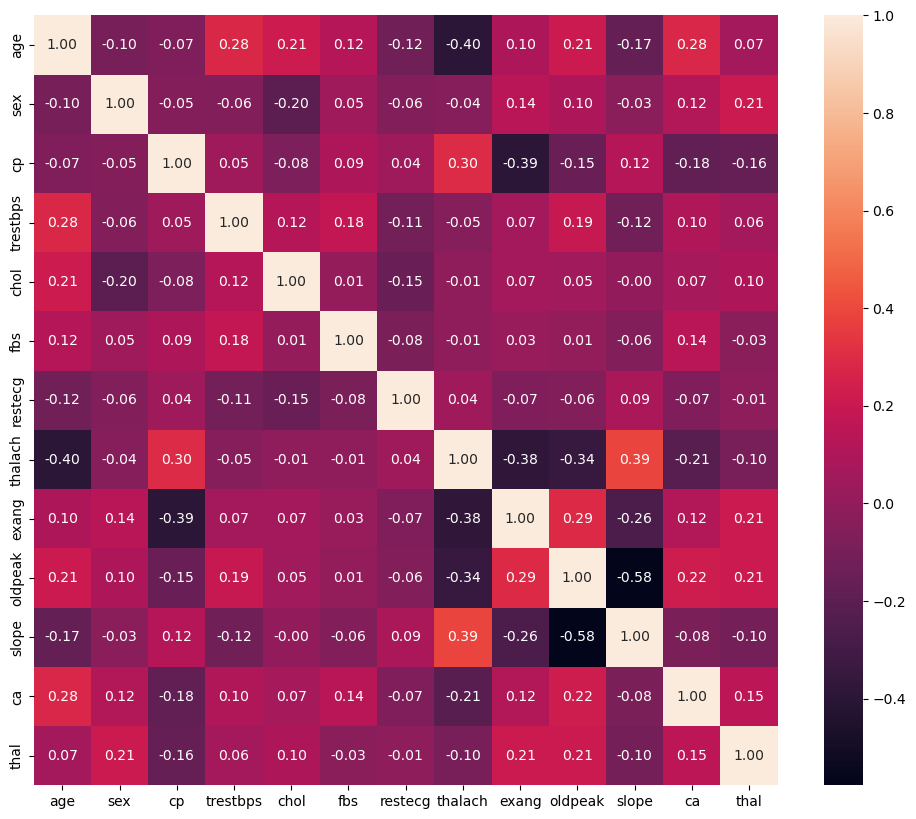

In [16]:
plt.figure(figsize=(12,10))
table = df.copy()
table.drop(['target'], axis=1, inplace = True)
sns.heatmap(table.corr(),annot=True,fmt='.2f')

for i in df.columns:
    print(i,len(df[i].unique()))

# 4. Splitting the Dataset into Training and Testing Set

- Classification algorithm falls under the category of supervised learning

- Dataset needs to be split into a subset for training and a subset for testing.

- The Models are trained on the training set and then examined using the testing set.

In [17]:
X = df.drop(['target'], axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Cross-Validation Method using Stratified K-Fold

In [18]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [19]:
model = GaussianNB(var_smoothing = 1e-10)
model.fit(X_train,y_train)
imps = permutation_importance(model, X_test, y_test)
print(imps.importances_mean)

[ 0.002  0.024  0.034 -0.002  0.002  0.     0.     0.052  0.026  0.076
  0.016  0.068  0.038]


# 5. Modelling and Performance Measure

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [25]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.88      0.84      0.86        58

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100



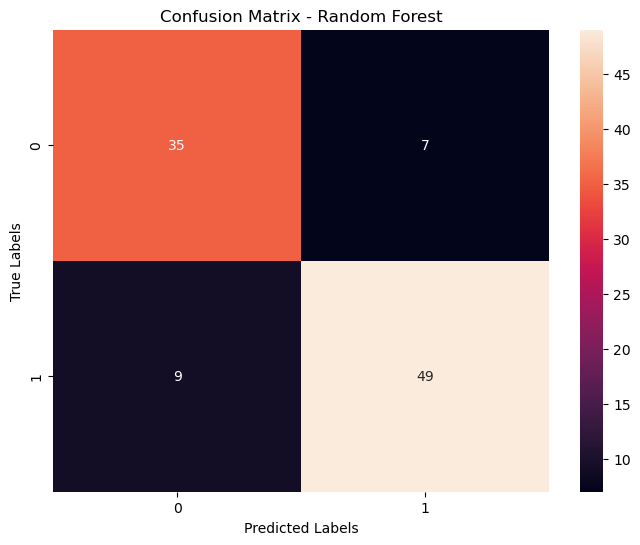

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### XGBoost

In [28]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        42
           1       0.86      0.83      0.84        58

    accuracy                           0.82       100
   macro avg       0.81      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



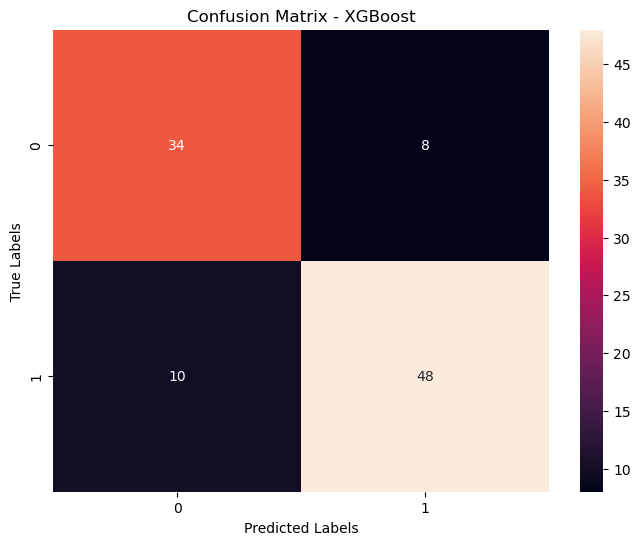

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### CatBoost

In [37]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

Learning rate set to 0.005215
0:	learn: 0.6881774	total: 58.5ms	remaining: 58.4s
1:	learn: 0.6839225	total: 59.3ms	remaining: 29.6s
2:	learn: 0.6810583	total: 60.1ms	remaining: 20s
3:	learn: 0.6765620	total: 60.9ms	remaining: 15.2s
4:	learn: 0.6731965	total: 61.7ms	remaining: 12.3s
5:	learn: 0.6691062	total: 62.4ms	remaining: 10.3s
6:	learn: 0.6648345	total: 63ms	remaining: 8.94s
7:	learn: 0.6602814	total: 63.7ms	remaining: 7.89s
8:	learn: 0.6565364	total: 64.4ms	remaining: 7.09s
9:	learn: 0.6529120	total: 65ms	remaining: 6.44s
10:	learn: 0.6486337	total: 65.6ms	remaining: 5.89s
11:	learn: 0.6447417	total: 66.2ms	remaining: 5.45s
12:	learn: 0.6403056	total: 67ms	remaining: 5.08s
13:	learn: 0.6373063	total: 67.7ms	remaining: 4.76s
14:	learn: 0.6335071	total: 68.3ms	remaining: 4.48s
15:	learn: 0.6296948	total: 68.9ms	remaining: 4.24s
16:	learn: 0.6264198	total: 69.6ms	remaining: 4.02s
17:	learn: 0.6228097	total: 70.3ms	remaining: 3.83s
18:	learn: 0.6188061	total: 70.9ms	remaining: 3.66s


311:	learn: 0.2494166	total: 189ms	remaining: 417ms
312:	learn: 0.2491238	total: 190ms	remaining: 416ms
313:	learn: 0.2486341	total: 190ms	remaining: 415ms
314:	learn: 0.2483369	total: 190ms	remaining: 413ms
315:	learn: 0.2482613	total: 190ms	remaining: 412ms
316:	learn: 0.2479484	total: 191ms	remaining: 411ms
317:	learn: 0.2474951	total: 191ms	remaining: 410ms
318:	learn: 0.2470176	total: 191ms	remaining: 409ms
319:	learn: 0.2462995	total: 192ms	remaining: 408ms
320:	learn: 0.2459605	total: 192ms	remaining: 407ms
321:	learn: 0.2455594	total: 193ms	remaining: 406ms
322:	learn: 0.2449051	total: 193ms	remaining: 405ms
323:	learn: 0.2443982	total: 193ms	remaining: 403ms
324:	learn: 0.2438781	total: 194ms	remaining: 402ms
325:	learn: 0.2434464	total: 194ms	remaining: 401ms
326:	learn: 0.2428232	total: 194ms	remaining: 400ms
327:	learn: 0.2424936	total: 195ms	remaining: 399ms
328:	learn: 0.2420730	total: 195ms	remaining: 398ms
329:	learn: 0.2417836	total: 195ms	remaining: 397ms
330:	learn: 

866:	learn: 0.1130039	total: 380ms	remaining: 58.3ms
867:	learn: 0.1128524	total: 380ms	remaining: 57.8ms
868:	learn: 0.1127340	total: 381ms	remaining: 57.4ms
869:	learn: 0.1126876	total: 381ms	remaining: 56.9ms
870:	learn: 0.1125222	total: 381ms	remaining: 56.5ms
871:	learn: 0.1124514	total: 382ms	remaining: 56ms
872:	learn: 0.1123856	total: 382ms	remaining: 55.6ms
873:	learn: 0.1122526	total: 382ms	remaining: 55.1ms
874:	learn: 0.1121769	total: 383ms	remaining: 54.7ms
875:	learn: 0.1120176	total: 383ms	remaining: 54.2ms
876:	learn: 0.1119048	total: 383ms	remaining: 53.8ms
877:	learn: 0.1117922	total: 384ms	remaining: 53.3ms
878:	learn: 0.1117246	total: 384ms	remaining: 52.9ms
879:	learn: 0.1116487	total: 384ms	remaining: 52.4ms
880:	learn: 0.1115331	total: 385ms	remaining: 52ms
881:	learn: 0.1114048	total: 385ms	remaining: 51.5ms
882:	learn: 0.1112669	total: 385ms	remaining: 51.1ms
883:	learn: 0.1111184	total: 386ms	remaining: 50.6ms
884:	learn: 0.1108836	total: 386ms	remaining: 50.2

In [38]:
print(classification_report(y_test,y_pred_catboost))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        42
           1       0.84      0.84      0.84        58

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



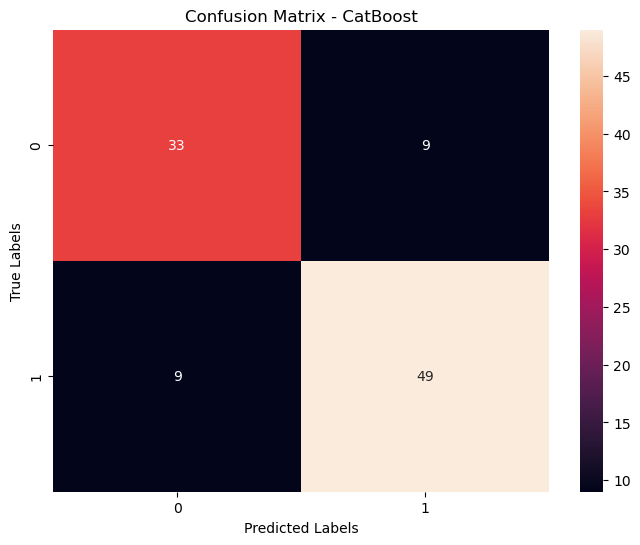

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_catboost)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix - CatBoost")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### Model Pipeline
In order to create a pipeline, we append the default state of all classification algorithms into the model list and then iterate through them to train, test, predict and evaluate.

In [ ]:
model_pipeline = []
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())

### Performance Measure

Below is an abstraction explanation of commonly used evaluation methods for classification models — accuracy, ROC & AUC and confusion matrix. Each of the following metrics is worth diving deeper

**1. Accuracy**

Accuracy is the most straightforward indicator of the model performance. It measure the percentage of accurate predictions:

- accuracy = (true positive + true negative) / (true positive + false positive + false negative + false positive)

**2. Confusion Matrix**

Confusion Matrix indicates the actual values vs. predicted values and summarize the **true negative, false positive, false negative and true positive values** in a matrix format.

In [ ]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(leaf_size = 1, p = 1, n_neighbors = 7)
scoring = ["accuracy", "precision", 'recall', 'f1']
for score in scoring:
  print(score, " = ", cross_val_score(knn, X, y, scoring = score, cv = 10).mean())

In [ ]:
from sklearn.model_selection import cross_val_score

naive_bayes = GaussianNB(var_smoothing = 1e-10)
scoring = ["accuracy", "precision", 'recall', 'f1']
for score in scoring:
  print(score, " = ", cross_val_score(naive_bayes, X, y, scoring = score, cv = 10).mean())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(solver = 'liblinear')
model2 = GaussianNB()
model = VotingClassifier([('lr', model1),('gnb', model2)])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, y_pred))

In [ ]:
pip install mlxtend --upgrade --no-deps

In [ ]:
df.columns

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets, neighbors
from sklearn.decomposition import PCA

def knn_comparison(data):
 pca = PCA(n_components = 2)
 X_init = data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
 X = pca.fit_transform(X_init)
 y = data['target'].values
 clf = KNeighborsClassifier(leaf_size = 1, p = 1, n_neighbors = 7)
 clf.fit(X, y)
 plot_decision_regions(X, y, clf=clf, legend=2)
 plt.legend(loc='best')
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('KNN Visualization')
 plt.show()

In [ ]:
knn_comparison(df)

In [ ]:
from sklearn.naive_bayes import GaussianNB
pca = PCA(n_components = 2)
X_init = X_train.values
X = pca.fit_transform(X_init)
X_pred = pca.transform(X_test)
y = y_train.values
model = GaussianNB(var_smoothing = 1e-10)
model.fit(X, y)
y_pred = model.predict(X_pred)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)
plt.title('Gaussian Naive-Bayes Visualizations')
plt.legend(loc='best')
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap
model = KNeighborsClassifier()
model.fit(X_train, y_train)
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap_values

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

In [ ]:
shap.plots.bar(shap_values[0])

In [ ]:
fig = plt.figure(figsize = (18, 10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True)
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

# 6. Conclusion

Based on three evaluations methods above, Naive Bayes have the best performance, whereas K Nearest Neighbors is not doing well.

However, this doesn’t mean that Naive Bayes are the superior algorithm. We can only say that, they are more suitable for this dataset where the size is relatively smaller and data is not at the same scale.

Each algorithm has its own preference and require different data processing and feature engineering techniques.

For example, K Nearest Neighbors is sensitive to features at difference scale.

Understanding the characteristics of each allows us to balance the trade-off and select the appropriate model according to the dataset.